Raport timp execuție: 64.69208838203849
Egalitate imagini integrale: True


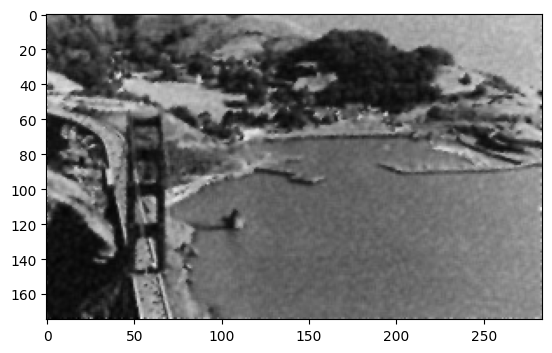

In [3]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
import time

def img_integrala(img, method=1):
    h, w = img.shape
    integral_img = np.zeros((h, w))
    
    if method == 1:  # Varianta clasică cu for
        for i in range(h):
            for j in range(w):
                integral_img[i, j] = img[i, j]
                if i > 0:
                    integral_img[i, j] += integral_img[i - 1, j]
                if j > 0:
                    integral_img[i, j] += integral_img[i, j - 1]
                if i > 0 and j > 0:
                    integral_img[i, j] -= integral_img[i - 1, j - 1]
    else:  # Varianta cu np.cumsum()
        integral_img = np.cumsum(np.cumsum(img, axis=0), axis=1)
    
    return integral_img

def suma_dreptunghi(x1, y1, x2, y2, integral_img):
    A = integral_img[x1 - 1, y1 - 1] if x1 > 0 and y1 > 0 else 0
    B = integral_img[x2, y1 - 1] if y1 > 0 else 0
    C = integral_img[x1 - 1, y2] if x1 > 0 else 0
    D = integral_img[x2, y2]
    return D + A - B - C

def filt_LEE(img, size, noise_var):
    h, w = img.shape
    capat = size // 2
    img_denoise = img.copy()
    img_integ = img_integrala(img, method=2)
    img_integ_sq = img_integrala(img**2, method=2)
    
    for i in range(capat, h - capat):
        for j in range(capat, w - capat):
            I_med = suma_dreptunghi(i - capat, j - capat, i + capat, j + capat, img_integ) / (size * size)
            I_sq_med = suma_dreptunghi(i - capat, j - capat, i + capat, j + capat, img_integ_sq) / (size * size)
            fer_var = I_sq_med - I_med**2
            fer_var = max(fer_var, noise_var)
            alpha = np.sqrt(noise_var / fer_var)
            img_denoise[i, j] = alpha * I_med + (1 - alpha) * img[i, j]
    
    return img_denoise

# Testare
img = io.imread('noise_img1.jpg')
img_gray = color.rgb2gray(img)
h, w = img_gray.shape

start1 = time.time()
img_integ1 = img_integrala(img_gray, method=1)
end1 = time.time()

start2 = time.time()
img_integ2 = img_integrala(img_gray, method=2)
end2 = time.time()

print("Raport timp execuție:", (end1 - start1) / (end2 - start2))
print("Egalitate imagini integrale:", np.allclose(img_integ1, img_integ2))

noise_var = img_gray[:10, :10].var()
img_denoise = filt_LEE(img_gray, 3, noise_var)
plt.imshow(img_denoise, cmap='gray')
plt.show()
